In [1]:
!ls "/home/aaron/EPICS/Disease/"


/bin/bash: /home/aaron/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Potato___Early_blight  Tomato___Bacterial_spot


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


2023-12-28 10:58:47.897558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 10:58:48.260272: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 10:58:49.243282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaron/anaconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64::/home/aaron/anaconda3/envs/tf/lib/
2023-12-28 10:58:49.243416: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not 

In [3]:
print(tf. __version__)

2.10.0


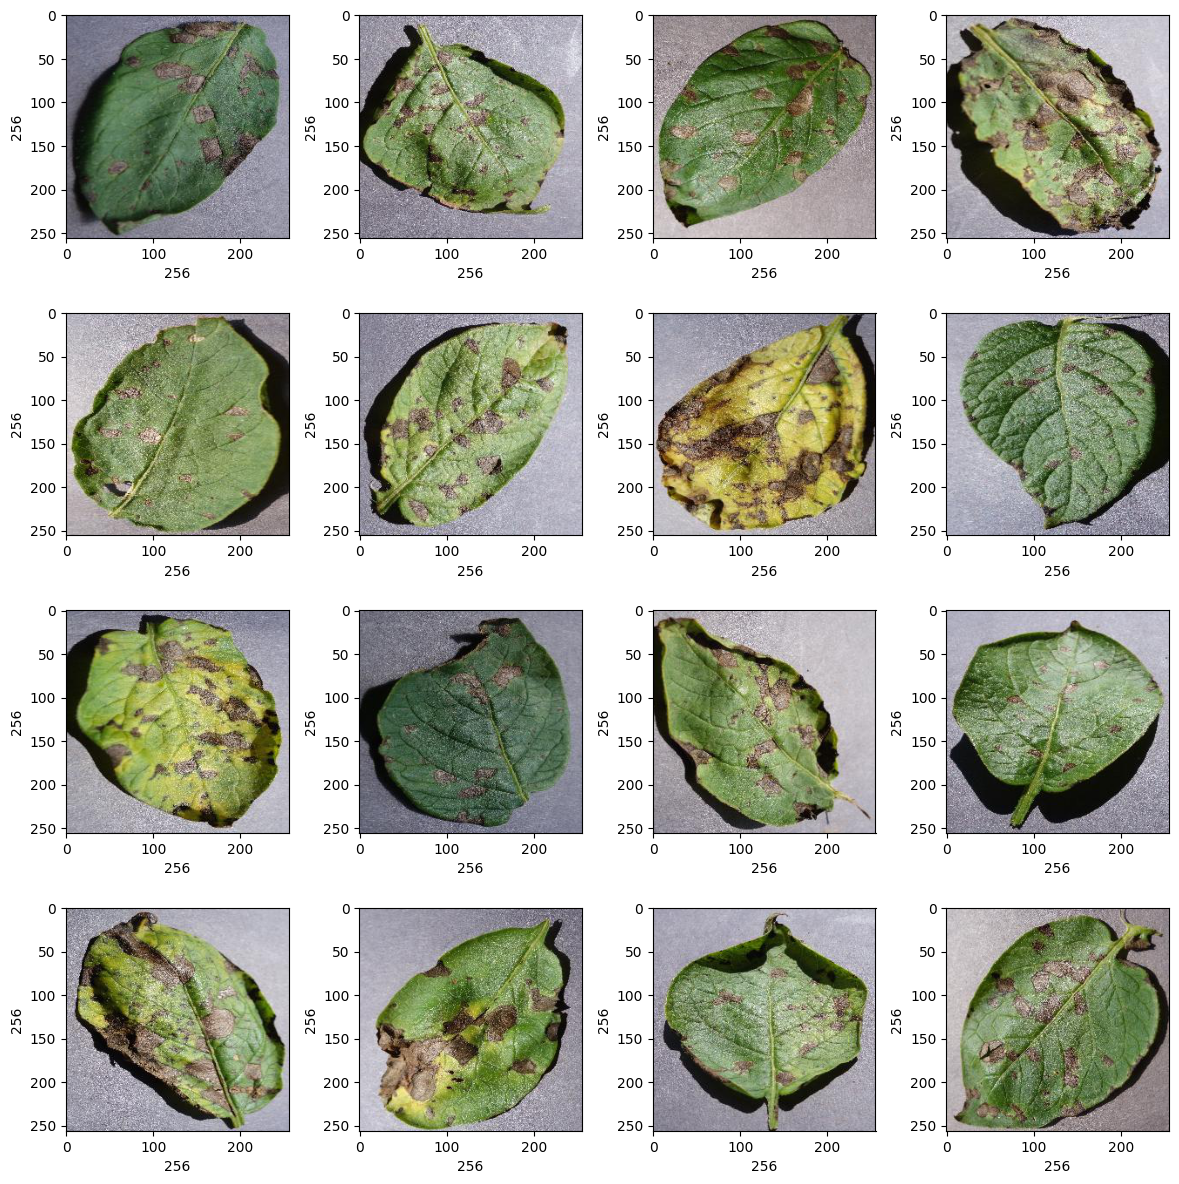

In [4]:
plt.figure(figsize=(12,12))
file_path="/home/aaron/EPICS/Disease/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(file_path +'/'+random.choice(sorted(os.listdir(file_path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize =10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

In [5]:
#convert Images to array
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None :
       image = cv2.resize(image,(256,256))
       return img_to_array(image)
    else:
       return np.array([])
  except Exception as e:
        print(f"Error ; {e}")
        return None


In [6]:
dir="/home/aaron/EPICS/Disease/"
image_list,label_list =[],[]
all_labels=['Tomato___Bacterial_spot','Potato___Early_blight']
binary_labels = [1,0]
temp =-1

for directory in ['Tomato___Bacterial_spot','Potato___Early_blight']:
  plant_image_list =os.listdir(f"{dir}/{directory}")
  temp +=1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
#visualize the number of classes count
label_count=pd.DataFrame(label_list).value_counts()
label_count.head()

1    1712
0     485
dtype: int64

In [8]:
X = np.array(image_list)
y= np.array(label_list)

In [9]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the images to 1D arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_reshaped, y_train)

In [ ]:
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


In [ ]:
image_list[0].shape

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils import shuffle
y_resampled_categorical = keras.utils.to_categorical(y_resampled, num_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.2, random_state=42)

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [ ]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()